In [2]:
import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

Using TensorFlow backend.


In [52]:
Classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
Train_Data = pd.read_csv('./fashion-mnist_train.csv')

Train_Data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Test_Data = pd.read_csv('./fashion-mnist_test.csv')

Test_Data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Train_img = Train_Data.drop('label', axis = 1)
Test_img = Test_Data.drop('label', axis = 1)

In [7]:
try:
    Train_array = np.load('./Train_array.npy')
    Test_array  = np.load('./Test_array.npy')
    
except:
    
    Train_array = np.zeros((60000,28,28,1))
    Test_array  = np.zeros((10000,28,28,1))

    with tqdm(60000) as pbar:
        for i in range(60000):
            for j in range(28):
                Train_array[i][j][:,0] += np.array(Train_img.iloc[i].values[j*28:(j+1)*28]) / 255
            pbar.update()
    with tqdm(10000) as pbar:
        for i in range(10000):
            for j in range(28):
                Test_array[i][j][:,0] += np.array(Test_img.iloc[i].values[j*28:(j+1)*28]) / 255
            pbar.update()
    np.save('Train_array', Train_array)
    np.save('Test_array', Test_array)

try:
    Train_target = np.load('./Train_target.npy')
    Test_target  = np.load('./Test_target.npy')

except:
    Train_target = np.zeros((60000,10))
    Test_target  = np.zeros((10000,10))
    with tqdm(60000) as pbar:
        for i in range(60000):
            Train_target[i][Train_Data['label'].iloc[i]] = 1
            pbar.update()        
    with tqdm(10000) as pbar:
        for i in range(10000):
            Test_target[i][Test_Data['label'].iloc[i]] = 1
            pbar.update()
    np.save('Train_target', Train_target)
    np.save('Test_target', Test_target)

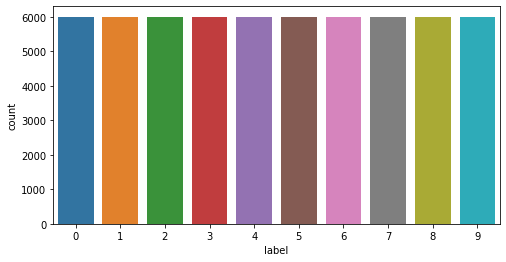

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(x=Train_Data['label']);

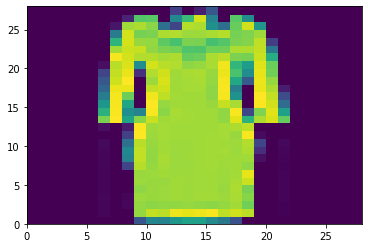

In [9]:
plt.pcolor(Train_array[4][::-1,:,0])

In [10]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout

from keras.optimizers import SGD

In [11]:
model = Sequential()

#model.add(Conv2D(16, (5, 5), padding='same', activation='selu', input_shape=(28,28,1)))
#model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(Conv2D(64, (1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Dropout(0.5))

#model.add(Conv2D(256, (1, 1), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(1,1)))
#model.add(Conv2D(512, (1, 1), padding='same', activation='relu'))
#model.add(MaxPool2D(pool_size=(1,1)))

model.add(Flatten())

model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='sigmoid'))

In [12]:
momentum = 0.8
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        2112      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        4160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)       

In [15]:
history = model.fit(Train_array, Train_target, validation_data=(Test_array, Test_target), epochs = 20, workers=4, batch_size = 50, use_multiprocessing=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 79s 1ms/step - loss: 1.0469 - accuracy: 0.5957 - val_loss: 0.5244 - val_accuracy: 0.7962
Epoch 2/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.5460 - accuracy: 0.8070 - val_loss: 0.3847 - val_accuracy: 0.8587
Epoch 3/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.4589 - accuracy: 0.8390 - val_loss: 0.3408 - val_accuracy: 0.8790
Epoch 4/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.4094 - accuracy: 0.8581 - val_loss: 0.3205 - val_accuracy: 0.8842
Epoch 5/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.3768 - accuracy: 0.8708 - val_loss: 0.2892 - val_accuracy: 0.8971
Epoch 6/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.3524 - accuracy: 0.8795 - val_loss: 0.2848 - val_accuracy: 0.8958
Epoch 7/20
60000/60000 [==============================] - 80s 1ms/st

In [16]:
model.evaluate(x=Test_array, y=Test_target, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=True)

10000/10000 [==============================] - 1s 146us/step


[0.20613984005451202, 0.9247999787330627]

In [53]:
model.save('./Fashion_AI.h5')

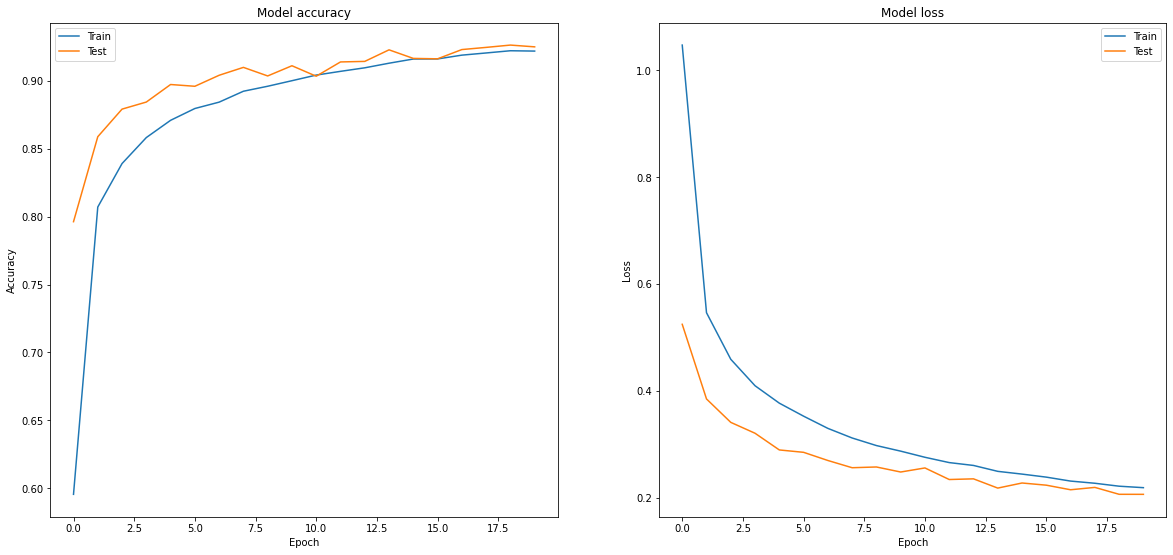

In [18]:
fig = plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()

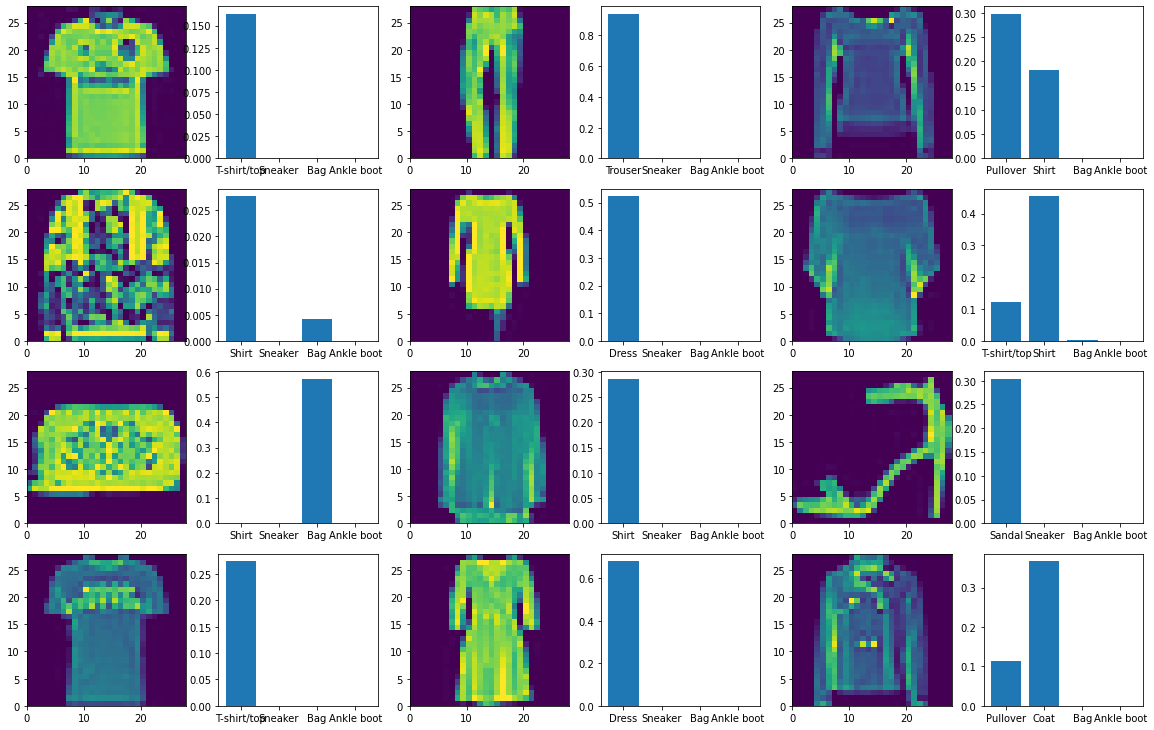

In [60]:
fig = plt.figure(figsize = (20,80))
for i in range(12):
    Classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    cur_bars    = list(model.predict(Test_array[0:12])[i])
    c = 0
    for j in range(10):
        if model.predict(Test_array[0:12])[i][j] < 0.1 and len(cur_bars) > 4:
            Classes.pop(j - c)
            cur_bars.pop(j - c)
            c += 1
    plt.subplot(24,6,i*2+1)
    plt.pcolor(Test_array[i][::-1,:,0])
    plt.subplot(24,6,i*2+2)
    plt.bar(Classes, cur_bars)

In [21]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(Train_array[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

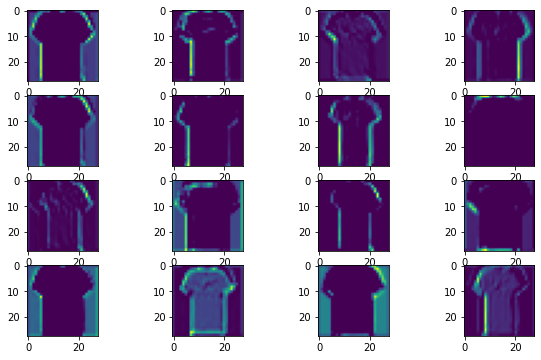

In [22]:
display_activation(activations, 4, 4, 1)

In [23]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(Test_array)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Test_target,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

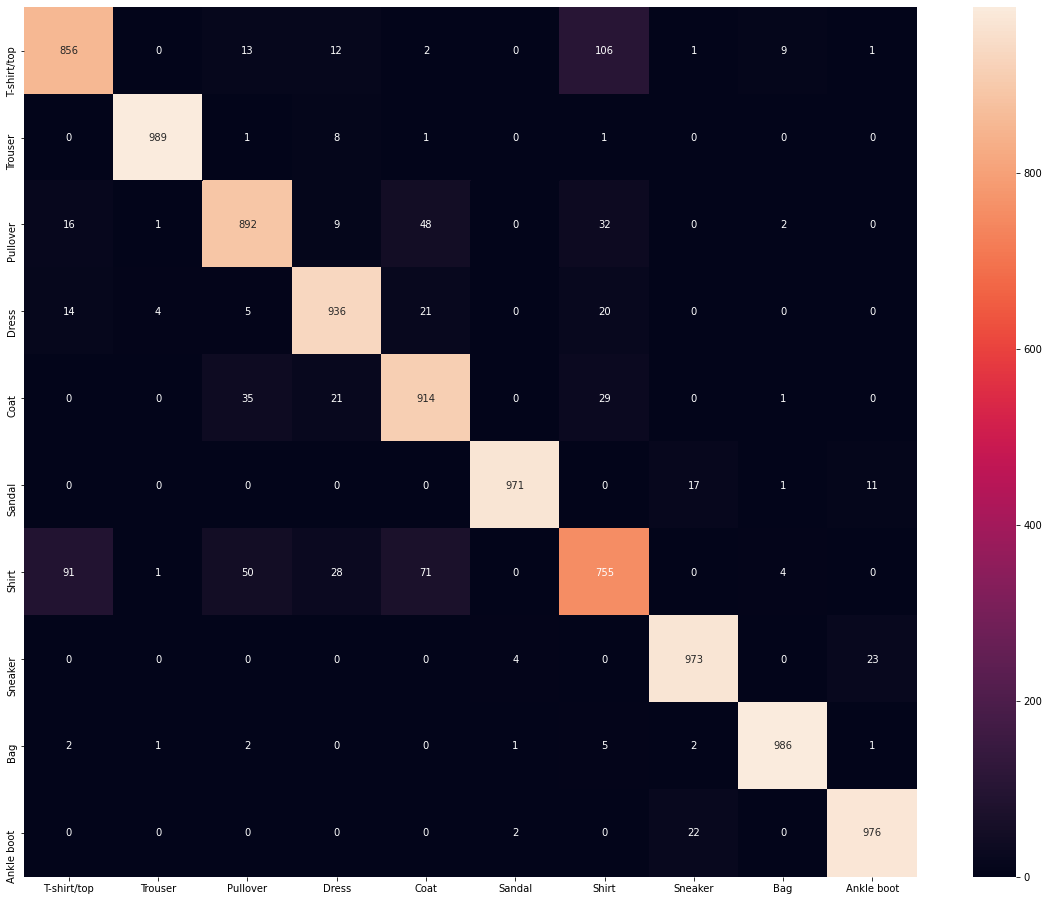

In [24]:
plt.figure(figsize=(20,16))
sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels = Classes, yticklabels = Classes);

In [54]:
from numpy import loadtxt
from keras.models import load_model

test_model = load_model('Fashion_AI.h5')

test_model.evaluate(x=Test_array, y=Test_target, use_multiprocessing=True)

10000/10000 [==============================] - 2s 163us/step


[0.20613984005451202, 0.9247999787330627]

In [35]:
a = []
help(a.pop)

Help on built-in function pop:

pop(index=-1, /) method of builtins.list instance
    Remove and return item at index (default last).
    
    Raises IndexError if list is empty or index is out of range.

